In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import gauss
import math

### Question 1.1

In [160]:
def construct(AV, IV, duration, N):
    """ Construct matrix TC """
    
    tc = np.array([])
    iv_count = IV
    
    # onsets arrival vector
    tc = np.zeros(AV)
    
    while len(tc) < N:
        
        # duration of ones
        
        for i in range(duration):
            if len(tc) >= N:
                break
            tc = np.append(tc, 1)

        # increment vector
        while (len(tc) < iv_count) & (len(tc) < N):
            tc = np.append(tc, 0)
        iv_count += IV
        
        # onsets arrival vector
        for i in range(AV):
            if len(tc) >= N:
                break
            tc = np.append(tc, 0)
        
    # Standardise
    tc = tc - np.mean(tc)
    tc = tc / np.std(tc)
    
    return tc

In [161]:
#(AV) = [0,20,0,0,0,0], (IV) = [30,45,60,40,40,40], duration of ones = [15,20,25,15,20,25].
tc1 = construct(0, 30, 15, 240)
tc2 = construct(20, 45, 20, 240)
tc3 = construct(0, 60, 25, 240)
tc4 = construct(0, 40, 15, 240)
tc5 = construct(0, 40, 20, 240)
tc6 = construct(0, 40, 25, 240)
TC = [tc1, tc2, tc3, tc4, tc5, tc6]

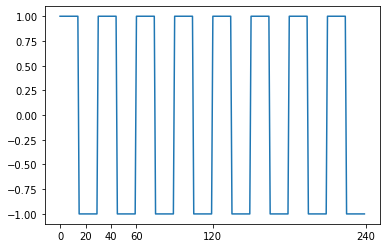

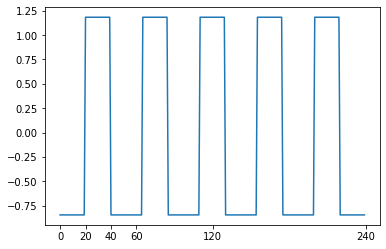

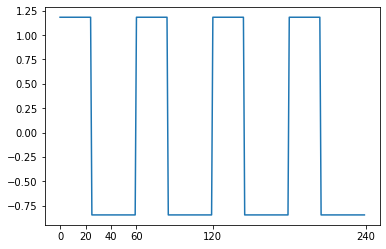

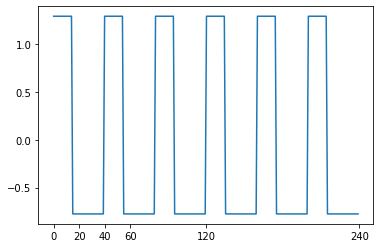

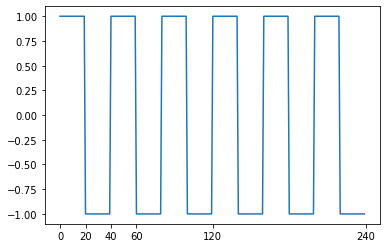

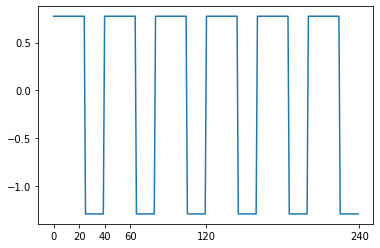

In [162]:
for tc in TC:
    plt.plot(tc)
    plt.xticks([0, 20, 40, 60, 120, 240])
    plt.show()

### Question 1.2

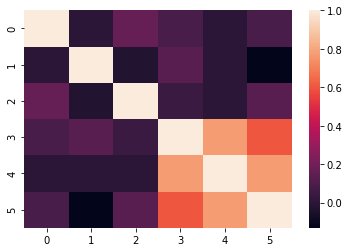

In [163]:
df = pd.DataFrame(TC)
tc_df = df.T
ax = sns.heatmap(tc_df.corr())

### Question 1.3

In [164]:
def one_slice(a, b, c, d):
    
    tmp_sm = np.zeros(441).reshape((21,21))
    
    for row in range(a-1, b):
        for col in range(c-1, d):
            tmp_sm[row][col] = 1.0
            
    return tmp_sm

In [165]:
#i) 02:06,02:06, ii) 02:06,15:19, iii) 08:13,02:06, iv) 08:13,15:19, v) 15:19,02:06, vi) 15:19,15:19
tmp1 = one_slice(2, 6, 2, 6)
tmp2 = one_slice(2, 6, 15, 19)
tmp3 = one_slice(8, 13, 2, 6)
tmp4 = one_slice(8, 13, 15, 19)
tmp5 = one_slice(15, 19, 2, 6)
tmp6 = one_slice(15, 19, 15, 19)

tmpSM = np.array([tmp1, tmp2, tmp3, tmp4, tmp5, tmp6])

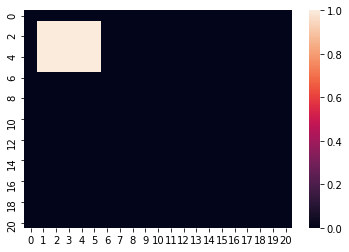

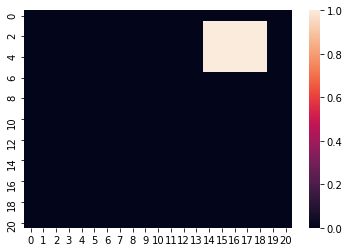

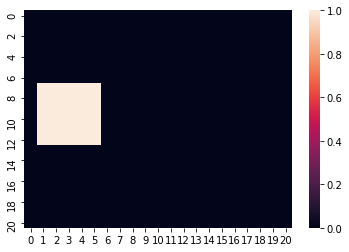

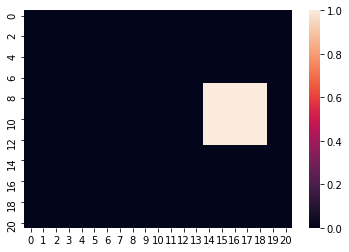

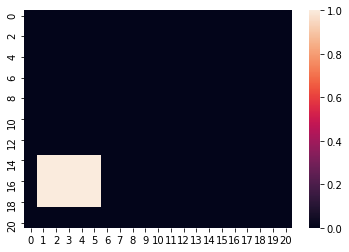

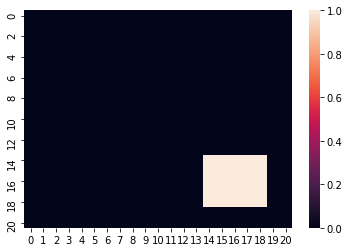

In [166]:
for tmp in tmpSM:
    tmp_df = pd.DataFrame(tmp)
    ax = sns.heatmap(tmp_df)
    plt.show()

In [167]:
SM = tmpSM.reshape((6, 441))

<AxesSubplot:>

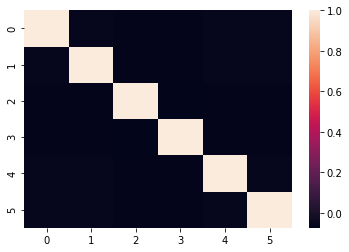

In [168]:
sm_df = pd.DataFrame(SM)
sm_df = sm_df.T
sns.heatmap(sm_df.corr())

### Question 1.4

In [169]:
temp_noise = np.array([gauss(0.0, math.sqrt(0.25)) for i in range(1440)])
temp_noise = temp_noise.reshape((240,6))

spatial_noise = np.array([gauss(0.0, math.sqrt(0.015)) for i in range(2646)])
spatial_noise = spatial_noise.reshape((6,441))

<AxesSubplot:>

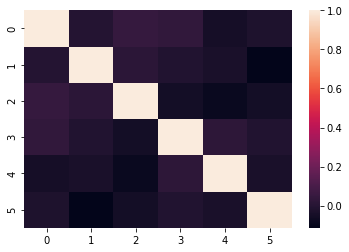

In [170]:
snoise_df = pd.DataFrame(spatial_noise)
snoise_df = snoise_df.T
sns.heatmap(snoise_df.corr())

<AxesSubplot:>

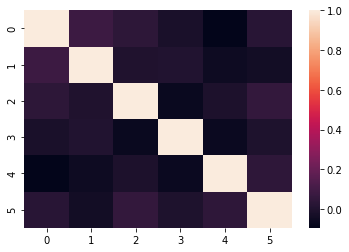

In [171]:
tnoise_df = pd.DataFrame(temp_noise)
sns.heatmap(tnoise_df.corr())

<AxesSubplot:ylabel='Count'>

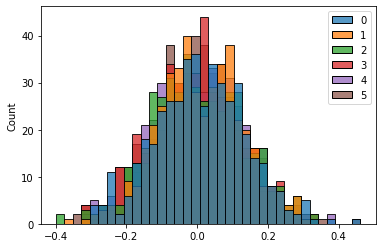

In [172]:
sns.histplot(data=snoise_df)

<AxesSubplot:ylabel='Count'>

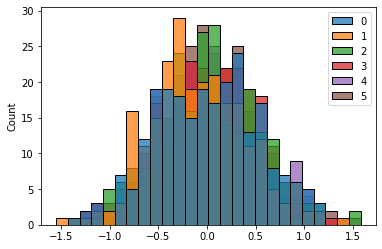

In [173]:
sns.histplot(data=tnoise_df)

In [174]:
TtTs = np.dot(temp_noise, spatial_noise)

<AxesSubplot:>

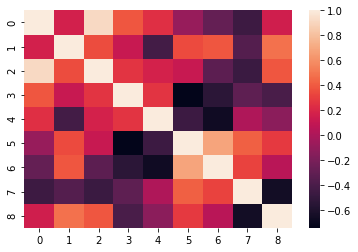

In [175]:
ttts_df = pd.DataFrame(TtTs)
mini_df = ttts_df[[0, 1, 2, 3, 4, 5, 6, 7, 8]]
sns.heatmap(mini_df.corr())

### Question 1.5

<AxesSubplot:>

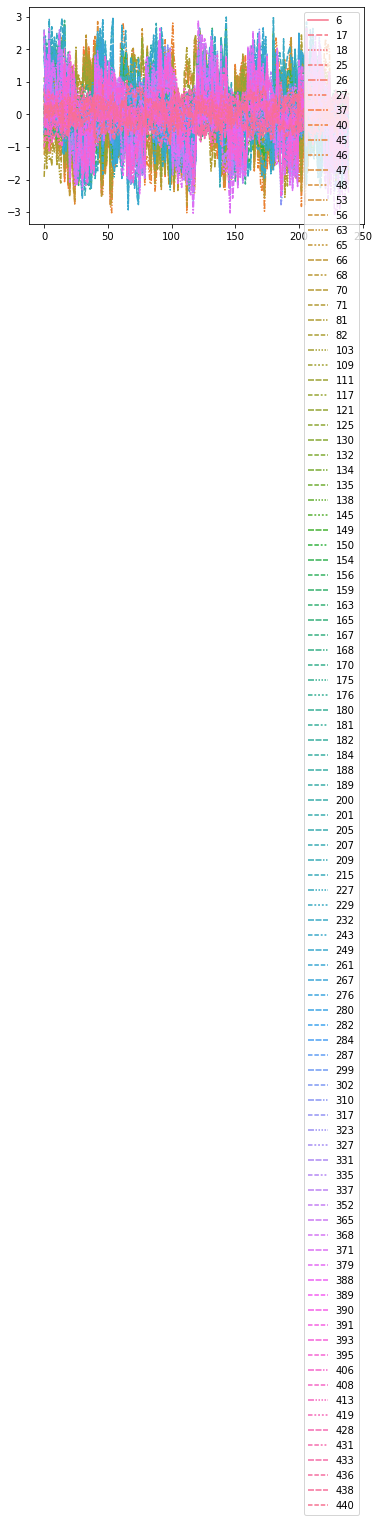

In [177]:
TC = np.transpose(TC)
X = np.dot((TC + temp_noise), (SM + spatial_noise))
X_df = pd.DataFrame(X)
randomly_selected = random.sample(list(range(0,441)), 100)
sample = X_df[randomly_selected]
sns.lineplot(data = sample)

<AxesSubplot:>

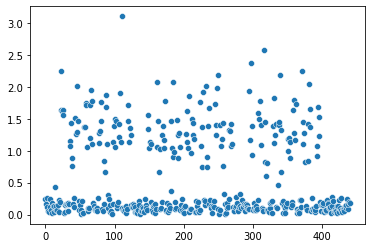

In [178]:
var = np.var(X_df)
sns.scatterplot(data = var)

In [179]:
# Standardise X
X = X - np.mean(X)
X = X / np.std(X)

### Question 2.1

In [183]:
DTD = np.dot(np.transpose(TC), TC)
DTD_inv = np.linalg.inv(DTD)
DTX = np.dot(np.transpose(TC), X)
A_lsr = np.dot(DTD_inv, DTX)
D_lsr = np.dot(X, np.transpose(A_lsr))

In [189]:
Alsr = []
for row in A_lsr:
    Alsr.append(row.reshape((21, 21)))

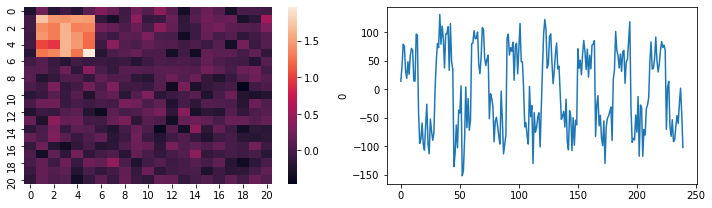

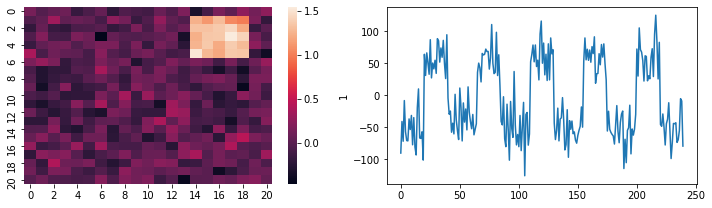

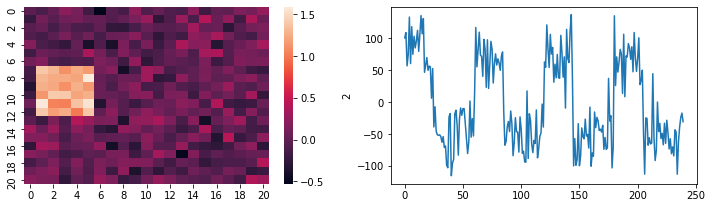

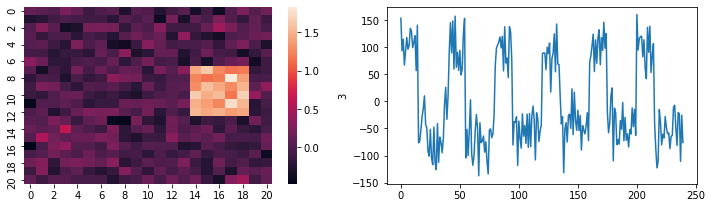

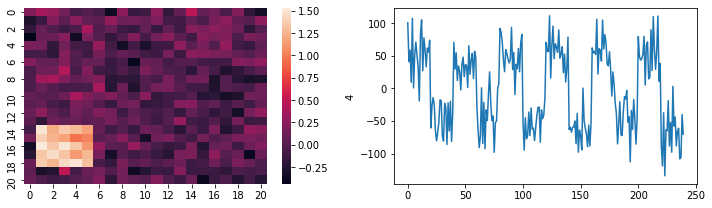

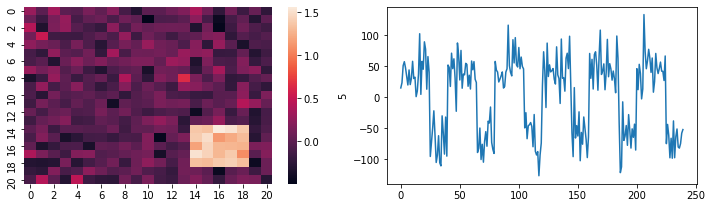

In [271]:
dlsr_df = pd.DataFrame(D_lsr)
for col in range(0, len(Alsr)):
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    sns.heatmap(data = Alsr[col], ax = axes[0])
    sns.lineplot(data=dlsr_df[col], ax = axes[1])
    plt.tight_layout()
    plt.show()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


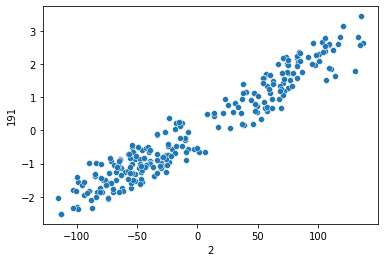

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


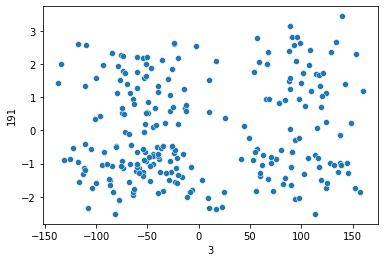

In [318]:
sns.scatterplot(dlsr_df[2], X_df[9*21 + 2])
plt.show()

sns.scatterplot(dlsr_df[3], X_df[9*21 + 2])
plt.show()

### Question 2.2

In [324]:
lamda_hat = 0.5 * 441
I = np.identity(6)
Z = DTD + np.dot(lamda_hat, I)
Z_inv = np.linalg.inv(Z)
A_rr = np.dot(Z_inv, DTX)
D_rr = np.dot(X, np.transpose(A_rr))

In [361]:
from scipy.stats import pearsonr

ctlsr = []
ctrr = []
for i in range(6):
        corr, _ = pearsonr(TC[i], D_lsr[i])
        ctlsr.append(corr)
        
        corr2, _ = pearsonr(TC[i], D_rr[i])
        ctrr.append(corr2)
        
print("Sum of CtRR greater than Sum of CtLSR: ", sum(ctrr) > sum(ctlsr))

Sum of CtRR greater than Sum of CtLSR:  True


In [362]:
lmda_alt = 1000 * 441
Z_alt = DTD + np.dot(lmda_alt, I)
Z_inv_alt = np.linalg.inv(Z_alt)
Arr_alt = np.dot(Z_inv_alt, DTX)

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='0'>

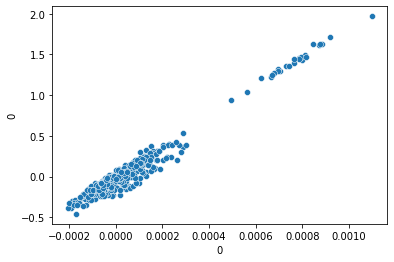

In [371]:
Arr_alt_df = pd.DataFrame(Arr_alt)
Arr_alt_df = Arr_alt_df.T

alsr_df = pd.DataFrame(A_lsr)
alsr_df = alsr_df.T

sns.scatterplot(Arr_alt_df[0], alsr_df[0])

In [372]:
Arr_alt_df[0]

0     -1.337367e-04
1      1.128429e-04
2     -9.381864e-05
3      1.095268e-05
4     -9.541688e-05
           ...     
436   -6.230984e-05
437    8.685132e-05
438    6.727790e-07
439    1.469209e-04
440    4.884607e-05
Name: 0, Length: 441, dtype: float64

<AxesSubplot:ylabel='0'>

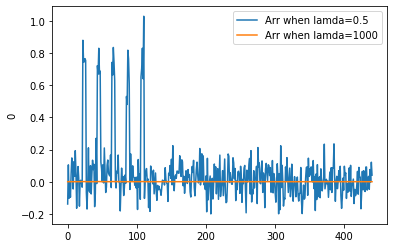

In [379]:
sns.lineplot(data=Arr_df[0], label='Arr when lamda=0.5')
sns.lineplot(data=Arr_alt_df[0], label='Arr when lamda=1000')

In [374]:
Arr_df = pd.DataFrame(np.transpose(A_rr))
Arr_df[0]

0     -0.139108
1      0.104680
2     -0.103043
3     -0.006854
4     -0.096636
         ...   
436   -0.047752
437    0.075750
438   -0.002622
439    0.121203
440    0.040520
Name: 0, Length: 441, dtype: float64

### Question 2.3

In [388]:
tc_df = pd.DataFrame(TC)
X_df.to_csv("../MAST30034-Assignment1/data/X.csv")
sm_df.to_csv("../MAST30034-Assignment1/data/SM.csv")
tc_df.to_csv("../MAST30034-Assignment1/data/TC.csv")

In [383]:
rho = []
r = 0.0
for i in range(21):
    rho.append(round(r, 2))
    r += 0.05

[0.0,
 0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95,
 1.0]